In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Kaggle/Used Cars Price Prediction/data

/content/drive/MyDrive/Colab Notebooks/Kaggle/Used Cars Price Prediction/data


In [ ]:
# 데이터 전처리
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 데이터 시각화
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 무시
pd.set_option('mode.chained_assignment',  None) # <==== 경고를 끈다

# 중고 자동차 가격 예측

## EDA 및 데이터 전처리

In [ ]:
train_df = pd.read_csv('train-data.csv', index_col = 'Unnamed: 0')
train_df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 658.3+ KB


In [ ]:
# New_Price 제거

train_df = train_df.drop(['New_Price'] , axis = 1)

In [ ]:
astype_int = ['Mileage',	'Engine',	'Power']
for col in astype_int :
  train_df[col] = train_df[col].str.split(' ').str[0]
  train_df[col] = train_df[col].apply(pd.to_numeric, errors='coerce')

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 611.3+ KB


In [ ]:
# 결측치 채우기

train_df['Mileage'].fillna(train_df['Mileage'].mean(), inplace = True)
train_df['Engine'].fillna(train_df['Engine'].mean(), inplace = True)
train_df['Power'].fillna(train_df['Power'].mean(), inplace = True)
train_df['Seats'].fillna(train_df['Seats'].mean(), inplace = True)

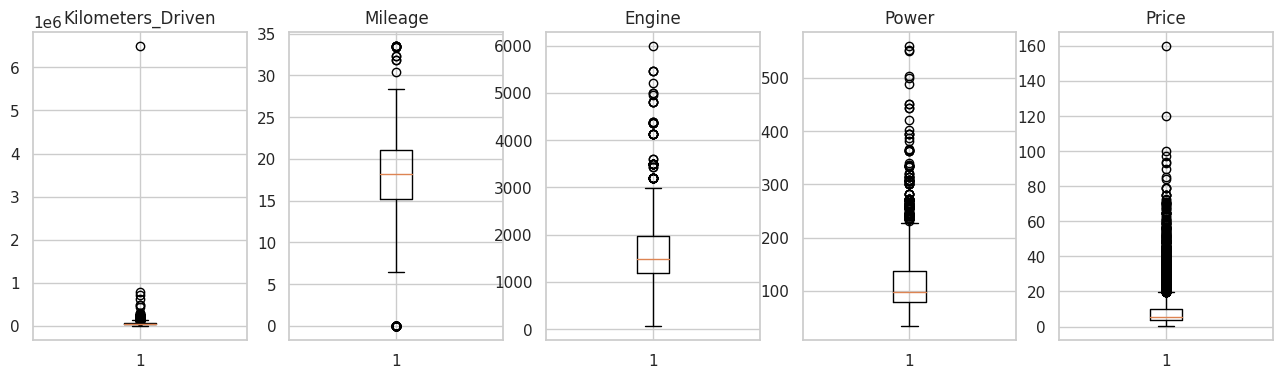

In [ ]:
# boxplot
fig, ax = plt.subplots(1,5, figsize = (16,4))
ax[0].boxplot(list(train_df.Kilometers_Driven))
ax[0].set_title('Kilometers_Driven')

ax[1].boxplot(list(train_df.Mileage))
ax[1].set_title('Mileage')

ax[2].boxplot(list(train_df.Engine))
ax[2].set_title('Engine')

ax[3].boxplot(list(train_df.Power))
ax[3].set_title('Power')

ax[4].boxplot(list(train_df.Price))
ax[4].set_title('Price')

plt.show()

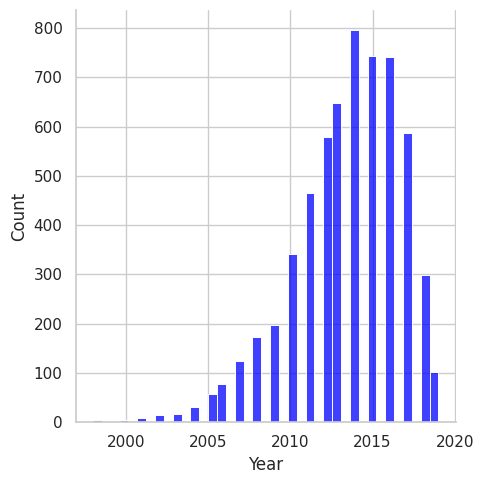

In [ ]:
# 연도 hist

sns.set_theme(style='whitegrid')
sns.displot(train_df["Year"], color="blue")

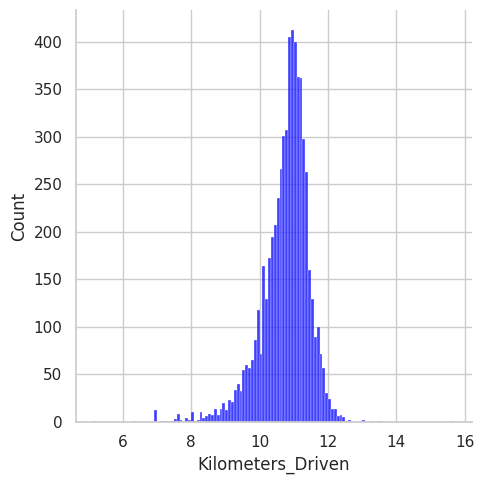

In [ ]:
# 운전 거리 log_scale hist
train_df['Kilometers_Driven'] = np.log1p(train_df['Kilometers_Driven'].values)

sns.displot(train_df["Kilometers_Driven"], color="blue")

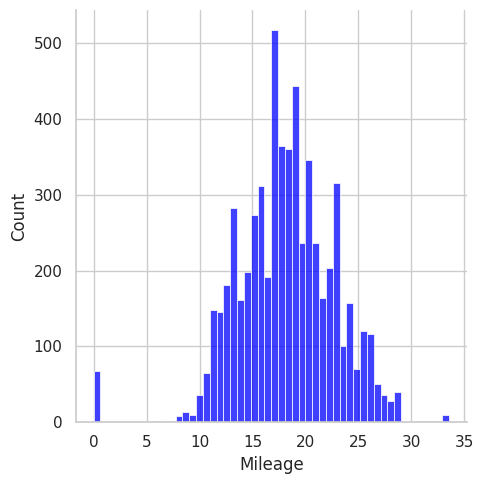

In [ ]:
# 마일리지 hist

sns.displot(train_df["Mileage"], color="blue")

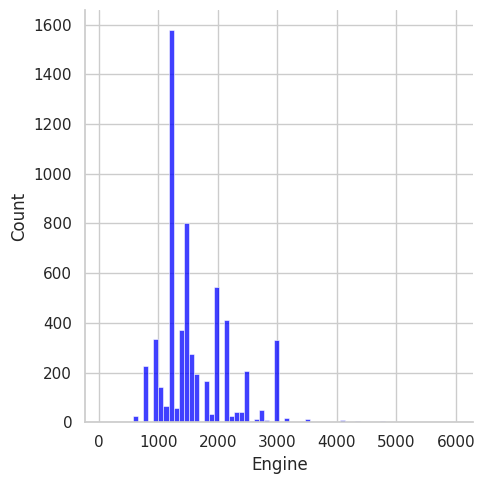

In [ ]:
# 엔진 hist

sns.displot(train_df["Engine"], color="blue")

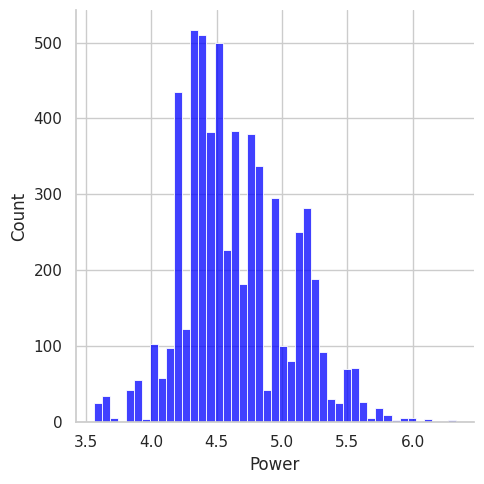

In [ ]:
# 파워 hist
train_df['Power'] = np.log1p(train_df['Power'].values)

sns.displot(train_df["Power"], color="blue")

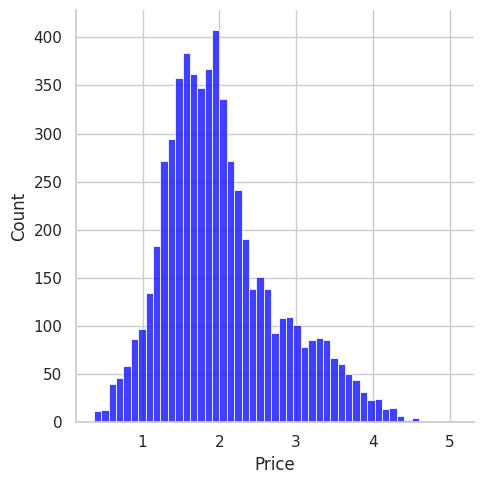

In [ ]:
# 가격 hist
train_df['Price'] = np.log1p(train_df['Price'].values)

# np.exp(train_df['Price']) - 1 원래대로

sns.displot(train_df["Price"], color="blue")

In [ ]:
# 결측치 확인
train_df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [ ]:
train_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,11.184435,CNG,Manual,First,26.60,998.0,4.080246,5.0,1.011601
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,10.621352,Diesel,Manual,First,19.67,1582.0,4.845761,5.0,2.602690
2,Honda Jazz V,Chennai,2011,10.736418,Petrol,Manual,First,18.20,1199.0,4.496471,5.0,1.704748
3,Maruti Ertiga VDI,Chennai,2012,11.373675,Diesel,Manual,First,20.77,1248.0,4.497139,7.0,1.945910
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,10.613271,Diesel,Automatic,Second,15.20,1968.0,4.954418,5.0,2.930660


<Axes: >

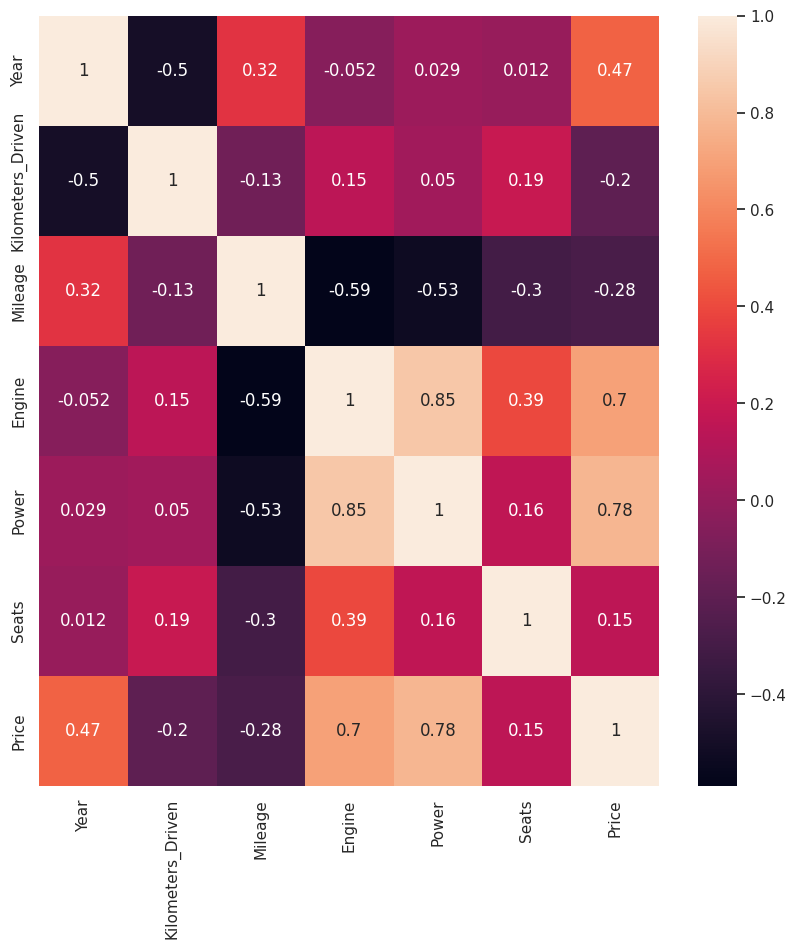

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(train_df.corr(numeric_only=True), annot = True)

### Name

In [ ]:
# Name 브랜드만 추출

train_df['Name'] = train_df['Name'].str.split(' ').str[0]
train_df['Name'].value_counts().tail()

Smart          1
Ambassador     1
Isuzu          1
Bentley        1
Lamborghini    1
Name: Name, dtype: int64

In [ ]:
name_counts = train_df['Name'].value_counts() < 30

In [ ]:
del_names = name_counts[name_counts].index

In [ ]:
train_df = train_df[~train_df['Name'].isin(del_names)]

In [ ]:
train_df['Name'].value_counts().tail()

Renault      145
Chevrolet    121
Nissan        91
Land          60
Jaguar        40
Name: Name, dtype: int64

### Location

In [ ]:
train_df['Location'].value_counts().tail()

Kolkata      518
Chennai      481
Jaipur       402
Bangalore    347
Ahmedabad    221
Name: Location, dtype: int64

### Fuel_Type

In [ ]:
train_df['Fuel_Type'].value_counts()

Diesel      3101
Petrol      2692
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [ ]:
name_counts = train_df['Fuel_Type'].value_counts() < 100
del_names = name_counts[name_counts].index
train_df = train_df[~train_df['Fuel_Type'].isin(del_names)]

In [ ]:
train_df['Fuel_Type'].value_counts()

Diesel    3101
Petrol    2692
Name: Fuel_Type, dtype: int64

### Transmission

In [ ]:
train_df['Transmission'].value_counts()

Manual       4148
Automatic    1645
Name: Transmission, dtype: int64

### Owner_Type

In [ ]:
train_df['Owner_Type'].value_counts()

First             4751
Second             928
Third              105
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [ ]:
train_df = train_df[train_df['Owner_Type'] != 'Fourth & Above']

In [ ]:
train_df['Owner_Type'].value_counts()

First     4751
Second     928
Third      105
Name: Owner_Type, dtype: int64

In [ ]:
train_df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [ ]:
train_df = train_df[['Price','Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',]]

### 범주 변수 처리

In [ ]:
train_df['Year'] = pd.Categorical(train_df['Year'])

In [ ]:
train_df = pd.get_dummies(train_df, prefix_sep = '_', drop_first = True)
train_df.head()

,Price,Kilometers_Driven,Mileage,Engine,Power,Seats,Name_BMW,Name_Chevrolet,Name_Ford,Name_Honda,...,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Owner_Type_Third
1,2.602690,10.621352,19.67,1582.0,4.845761,5.0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,1.704748,10.736418,18.20,1199.0,4.496471,5.0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
3,1.945910,11.373675,20.77,1248.0,4.497139,7.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2.930660,10.613271,15.20,1968.0,4.954418,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,1.504077,11.373663,23.08,1461.0,4.160444,5.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X = train_df.iloc[:,1:]
y = train_df['Price']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (5784, 56)
y 데이터:  (5784,)


## 데이터 분석 : 선형회귀

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (4627, 56)
test 데이터:  (1157, 56)


In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X_train)
X_train_scale = standard.transform(X_train)
X_test_scale = standard.transform(X_test)

In [ ]:
# 모델 적용
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scale, y_train)

LinearRegression()

In [ ]:
print(lr.score(X_train_scale,y_train))
print(lr.score(X_test_scale, y_test))

0.9353879983699703
0.9348802256631508


In [ ]:
print(np.array(y_train))

[1.32175584 2.39789527 0.99325177 ... 1.55814462 2.52892354 2.06051353]


In [ ]:
print(lr.predict(X_train_scale))

[1.4252287  2.25404837 1.19360775 ... 1.50055422 2.57137962 1.88759703]


In [ ]:
compare = pd.DataFrame({'Actual': np.exp(np.array(y_train)) + 1, 'Predicted': np.exp(lr.predict(X_train_scale)) + 1})

In [ ]:
compare

,Actual,Predicted
0,4.75,5.158809
1,12.00,10.526224
2,3.70,4.298962
3,5.70,4.862730
4,7.00,7.578574
...,...,...
4622,21.00,21.923549
4623,5.75,6.182487
4624,5.75,5.484174
4625,13.54,14.083863


## 데이터분석 : GradientBoostingRegressor

In [159]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param = {
    'n_estimators' : [100, 500, 100],
    'learning_rate' : [0.05, 0.1, 0.5]
}


In [160]:
grid_search = GridSearchCV(GradientBoostingRegressor(loss = 'huber'),
                           param,
                           cv = 3,
                           return_train_score = True)

grid_search.fit(X_train_scale, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(loss='huber'),
             param_grid={'learning_rate': [0.05, 0.1, 0.5],
                         'n_estimators': [100, 500, 100]},
             return_train_score=True)

In [161]:
grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [162]:
gb = GradientBoostingRegressor(min_samples_leaf = 10, min_samples_split = 5, learning_rate = 0.1, n_estimators = 500)
gb.fit(X_train_scale, y_train)

GradientBoostingRegressor(min_samples_leaf=10, min_samples_split=5,
                          n_estimators=500)

In [163]:
print(gb.score(X_train_scale, y_train))
print(gb.score(X_test_scale, y_test))

0.9672846786270121
0.9467787290474029


## test 데이터 사용

In [256]:
df_test = pd.read_csv('test-data.csv', index_col = 'Unnamed: 0')
df = pd.read_csv('test-data.csv', index_col = 'Unnamed: 0')
df_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [257]:
# New_Price 제거

df_test = df_test.drop(['New_Price'] , axis = 1)

In [258]:
astype_int = ['Mileage',	'Engine',	'Power']
for col in astype_int :
  df_test[col] = df_test[col].str.split(' ').str[0]
  df_test[col] = df_test[col].apply(pd.to_numeric, errors='coerce')

In [259]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   float64
 8   Engine             1224 non-null   float64
 9   Power              1202 non-null   float64
 10  Seats              1223 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 115.7+ KB


In [260]:
# 결측치 채우기

df_test['Mileage'].fillna(df_test['Mileage'].mean(), inplace = True)
df_test['Engine'].fillna(df_test['Engine'].mean(), inplace = True)
df_test['Power'].fillna(df_test['Power'].mean(), inplace = True)
df_test['Seats'].fillna(df_test['Seats'].mode()[0], inplace = True)

In [261]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   float64
 8   Engine             1234 non-null   float64
 9   Power              1234 non-null   float64
 10  Seats              1234 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 115.7+ KB


In [262]:
# log 변환

df_test['Kilometers_Driven'] = np.log1p(df_test['Kilometers_Driven'].values)

In [263]:
# Name 브랜드만 추출

df_test['Name'] = df_test['Name'].str.split(' ').str[0]
df_test['Name'].value_counts().tail()

Hindustan    1
Isuzu        1
Porsche      1
ISUZU        1
OpelCorsa    1
Name: Name, dtype: int64

In [264]:
name_counts = df_test['Name'].value_counts() < 10
del_names = name_counts[name_counts].index
df_test = df_test[~df_test['Name'].isin(del_names)]

In [265]:
df_test['Fuel_Type'].value_counts()

Diesel    608
Petrol    568
CNG         6
LPG         2
Name: Fuel_Type, dtype: int64

In [266]:
name_counts = df_test['Fuel_Type'].value_counts() < 10
del_names = name_counts[name_counts].index
df_test = df_test[~df_test['Fuel_Type'].isin(del_names)]

In [267]:
df_test['Owner_Type'].value_counts()

First             973
Second            176
Third              24
Fourth & Above      3
Name: Owner_Type, dtype: int64

In [268]:
df_test = df_test[df_test['Owner_Type'] != 'Fourth & Above']

In [269]:
df_test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
1,Maruti,Coimbatore,2013,10.905846,Petrol,Manual,Second,24.70,796.0,47.30000,5.0
2,Toyota,Mumbai,2017,10.434145,Diesel,Manual,First,13.68,2393.0,147.80000,7.0
3,Toyota,Hyderabad,2012,11.842236,Diesel,Manual,First,23.59,1364.0,110.38042,5.0
4,Hyundai,Mumbai,2014,10.275086,Petrol,Manual,First,18.50,1197.0,82.85000,5.0
5,Mahindra,Coimbatore,2016,11.357557,Diesel,Manual,Second,16.00,2179.0,140.00000,7.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen,Hyderabad,2011,11.401010,Diesel,Manual,First,20.54,1598.0,103.60000,5.0
1230,Volkswagen,Mumbai,2015,10.985310,Petrol,Automatic,First,17.21,1197.0,103.60000,5.0
1231,Nissan,Kolkata,2012,10.239996,Diesel,Manual,First,23.08,1461.0,63.10000,5.0
1232,Volkswagen,Pune,2013,10.864044,Petrol,Automatic,Third,17.20,1197.0,103.60000,5.0


In [270]:
df_test['Year'] = pd.Categorical(df_test['Year'])

In [271]:
df_test = pd.get_dummies(df_test, prefix_sep = '_', drop_first = True)
X = df_test
X.columns

Index(['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Name_BMW',
       'Name_Chevrolet', 'Name_Fiat', 'Name_Ford', 'Name_Honda',
       'Name_Hyundai', 'Name_Mahindra', 'Name_Maruti', 'Name_Mercedes-Benz',
       'Name_Nissan', 'Name_Renault', 'Name_Skoda', 'Name_Tata', 'Name_Toyota',
       'Name_Volkswagen', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Year_2002', 'Year_2003',
       'Year_2004', 'Year_2005', 'Year_2006', 'Year_2007', 'Year_2008',
       'Year_2009', 'Year_2010', 'Year_2011', 'Year_2012', 'Year_2013',
       'Year_2014', 'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018',
       'Year_2019', 'Fuel_Type_Petrol', 'Transmission_Manual',
       'Owner_Type_Second', 'Owner_Type_Third'],
      dtype='object')

In [272]:
train_df.columns

Index(['Price', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Name_BMW', 'Name_Chevrolet', 'Name_Ford', 'Name_Honda', 'Name_Hyundai',
       'Name_Jaguar', 'Name_Land', 'Name_Mahindra', 'Name_Maruti',
       'Name_Mercedes-Benz', 'Name_Nissan', 'Name_Renault', 'Name_Skoda',
       'Name_Tata', 'Name_Toyota', 'Name_Volkswagen', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune', 'Year_1999',
       'Year_2000', 'Year_2001', 'Year_2002', 'Year_2003', 'Year_2004',
       'Year_2005', 'Year_2006', 'Year_2007', 'Year_2008', 'Year_2009',
       'Year_2010', 'Year_2011', 'Year_2012', 'Year_2013', 'Year_2014',
       'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Owner_Type_Second',
       'Owner_Type_Third'],
      dtype='object')

In [281]:
X['Name_Land'] = 0
X['Year_1999'] = 0
X['Year_2000'] = 0
X['Year_2001'] = 0

### GradientBoostingRegressor 사용

In [282]:
print(gb.predict(X))

[3.05496327 3.05496327 3.05496327 ... 3.05496327 3.05496327 3.06991746]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [283]:
pred = pd.DataFrame({'Predicted': np.exp(gb.predict(X)) + 1})

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [284]:
pred

,Predicted
0,22.220406
1,22.220406
2,22.220406
3,22.220406
4,22.220406
...,...
1168,22.220406
1169,22.220406
1170,22.220406
1171,22.220406
